## NoteBook to Train and Visualize the U-Net Network

In [1]:
# Importing bunch of libraries
import os
import sys
import time
import random
import warnings

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from sklearn.model_selection import train_test_split



from model import UNet
import logging

seed = 42
random.seed = seed
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device: ", device)

Using device:  cuda


### This is where the actual implementation of the algorithm starts. You should run everything in order
#### A) Get the training data (original images + masks). It is better that the images and masks have the same names. The only thing you need to be concerned with is the sorting of the images. They will be sorted by their names, so you want your original images and corresponding masks to have matching names.  This section adds the original images' path to TRAIN_PATH, and the masks' path to MASK_PATH. You don't have to worry about the naming if you are using our datasets from Google Drive.

#### You should replace the paths with the ones corresponding to your machine. Open a terminal, go to the All_Skin_Datasets directory, and type pwd. That would be the path to the datasets folder. 

In [2]:
# Dataset 1: HGR
TRAIN_PATH1 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset1_HGR/original_images/']
MASK_PATH1 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset1_HGR/skin_masks/']
train_ids1 = next(os.walk(TRAIN_PATH1[0]))[2]
mask_ids1 = next(os.walk(MASK_PATH1[0]))[2]
train_ids1.sort()
mask_ids1.sort()
TRAIN_PATH1 = TRAIN_PATH1*len(train_ids1)
MASK_PATH1 = MASK_PATH1*len(train_ids1)

# Dataset 2: TDSD
TRAIN_PATH5 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset2_TDSD/original_images/']
MASK_PATH5 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset2_TDSD/skin_masks/']
train_ids5 = next(os.walk(TRAIN_PATH5[0]))[2]
mask_ids5 = next(os.walk(MASK_PATH5[0]))[2]
train_ids5.sort()
mask_ids5.sort()
TRAIN_PATH5 = TRAIN_PATH5*len(train_ids5)
MASK_PATH5 = MASK_PATH5*len(train_ids5)

# Dataset 3: Schmugge
TRAIN_PATH6 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset3_Schmugge/original_images/']
MASK_PATH6 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset3_Schmugge/skin_masks/']
train_ids6 = next(os.walk(TRAIN_PATH6[0]))[2]
mask_ids6 = next(os.walk(MASK_PATH6[0]))[2]
train_ids6.sort()
mask_ids6.sort()
TRAIN_PATH6 = TRAIN_PATH6*len(train_ids6)
MASK_PATH6 = MASK_PATH6*len(train_ids6)

# Dataset 4: Pratheepan
TRAIN_PATH2 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset4_Pratheepan/original_images/']
MASK_PATH2 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset4_Pratheepan/skin_masks/']
train_ids2 = next(os.walk(TRAIN_PATH2[0]))[2]
mask_ids2 = next(os.walk(MASK_PATH2[0]))[2]
train_ids2.sort()
mask_ids2.sort()
TRAIN_PATH2 = TRAIN_PATH2*len(train_ids2)
MASK_PATH2 = MASK_PATH2*len(train_ids2)

# Dataset 5: VDM
TRAIN_PATH3 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset5_VDM/original_images/']
MASK_PATH3 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset5_VDM/skin_masks/']
train_id3 = next(os.walk(TRAIN_PATH3[0]))[2]
mask_id3 = next(os.walk(MASK_PATH3[0]))[2]
train_id3.sort()
mask_id3.sort()
train_ids3 = train_id3[1:]
mask_ids3 = mask_id3[1:]
TRAIN_PATH3 = TRAIN_PATH3*len(train_ids3)
MASK_PATH3 = MASK_PATH3*len(train_ids3)

# Dataset 6: SFA
TRAIN_PATH4 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset6_SFA/original_images/']
MASK_PATH4 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset6_SFA/skin_masks/']
train_ids4 = next(os.walk(TRAIN_PATH4[0]))[2]
mask_ids4 = next(os.walk(MASK_PATH4[0]))[2]
train_ids4.sort()
mask_ids4.sort()
TRAIN_PATH4 = TRAIN_PATH4*len(train_ids4)
MASK_PATH4 = MASK_PATH4*len(train_ids4)

# Dataset 7: FSD
TRAIN_PATH7 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset7_FSD/original_images/']
MASK_PATH7 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset7_FSD/skin_masks/']
train_ids7 = next(os.walk(TRAIN_PATH7[0]))[2]
mask_ids7 = next(os.walk(MASK_PATH7[0]))[2]
train_ids7.sort()
mask_ids7.sort()
TRAIN_PATH7 = TRAIN_PATH7*len(train_ids7)
MASK_PATH7 = MASK_PATH7*len(train_ids7)

# # Dataset 8: ABDOMEN
TRAIN_PATH8 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset8_Abdomen/train/original_images/']
MASK_PATH8 = ['/home/anirudh/skin_dataset/All_Skin_Datasets/Dataset8_Abdomen/train/skin_masks/']
train_ids8 = next(os.walk(TRAIN_PATH8[0]))[2]
mask_ids8 = next(os.walk(MASK_PATH8[0]))[2]
train_ids8.sort()
mask_ids8.sort()

TRAIN_PATH8 = TRAIN_PATH8*len(train_ids8)
MASK_PATH8 = MASK_PATH8*len(train_ids8)

# Combining all datasets together
TRAIN_PATH = np.concatenate((TRAIN_PATH1,TRAIN_PATH2,TRAIN_PATH3,TRAIN_PATH4,TRAIN_PATH5, TRAIN_PATH6,TRAIN_PATH7,TRAIN_PATH8))
MASK_PATH = np.concatenate((MASK_PATH1,MASK_PATH2,MASK_PATH3,MASK_PATH4,MASK_PATH5,MASK_PATH6,MASK_PATH7,MASK_PATH8))
train_ids = np.concatenate((train_ids1,train_ids2,train_ids3,train_ids4,train_ids5,train_ids6,train_ids7,train_ids8))
mask_ids = np.concatenate((mask_ids1,mask_ids2,mask_ids3,mask_ids4,mask_ids5,mask_ids6,mask_ids7,mask_ids8))

In [3]:
#  Parameters to prepare training and test data. 
# Specify image dimensions
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
# Batch size for training. 
batch_size = 16
# Control the size of split of training vs testing. 
train_to_test_split_ratio = 0.8

# Flag to control if data preparation is required. It should be true when running the notebook for the first time or if the image dimensions are changed. 
prepare_data = False

#### B) Shuffle the data and resize to the dimensions specified in the first block

In [4]:
if prepare_data:
    # This creates two array of zeros (for the ground truth and mask data) to store the images in them. Note the images are 
    # expected to be in channel foirst format. 
    images = np.zeros((len(train_ids),IMG_CHANNELS, IMG_HEIGHT, IMG_WIDTH), dtype = np.float)
    labels = np.zeros((len(train_ids), 1, IMG_HEIGHT, IMG_WIDTH),dtype = np.float)
    print('Getting and resizing train images and masks ... ')
    sys.stdout.flush()
    g = list(range(0,len(train_ids)))
    np.random.shuffle(g)

    # Creates string arrays to store the path for every training image
    strs_original = ["" for x in range(len(train_ids))]
    strs_mask = ["" for x in range(len(train_ids))]
    pathmsk = MASK_PATH[0] + mask_ids[0]
    # Store images path in the corresponding arrays (one array for masks, one for the original ones)
    for n, id_ in tqdm.tqdm(enumerate(train_ids), total=len(train_ids)):
        strs_mask[n] = MASK_PATH[n] + mask_ids[n]
        strs_original[n] = TRAIN_PATH[n] + train_ids[n]

    # Read images from their paths and store them in arrays
    for n, id_ in tqdm.tqdm(enumerate(train_ids), total=len(train_ids)):
        #  Process image. 
        path = strs_original[g[n]]
        img = np.asarray(imread(path)[:,:,:IMG_CHANNELS])
        # Resize the image to fixed dimension. 
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant')
        # Make the image channel first. (NHWC -> NCHW)
        img = np.transpose(img, (2, 0, 1))
        images[n] = img

        #  Process masks. 
        path = strs_mask[g[n]]
        mask = np.asarray(imread(path))
        if mask.ndim == 3:
            mask = mask[:,:,1]
        # Resize the image to fixed dimension. 
        mask = np.expand_dims(resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant'), axis=-1)
        # Make binary lables. 
        mask = mask > 0
        # Make the image channel first. (NHWC -> NCHW)
        mask = np.transpose(mask, (2, 0, 1))
        labels[n] = mask      




Save the data to load easily next time.

In [5]:
#  Save and load the images and labels so that you dont have to run the above step everytime. 
if prepare_data:
    print("Saved the shuffled images and labels locally.")
    np.save("images",images)
    np.save("labels",labels)
else:
    print("Loaded the shuffled images and labels from local path.")
    images = np.load('./images.npy')
    labels = np.load('./labels.npy')

Loaded the shuffled images and labels from local path.


Creating Train and Test DataLoader Object

In [6]:
# Split the Training and Test dataset.
random_state = 1  # To get reproducible results.  
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, train_size=train_to_test_split_ratio, random_state=random_state, shuffle = True)

# Create tuple pair of training data. 
train_data = []
for i in range(len(images_train)):
   train_data.append([images_train[i], labels_train[i]])

# Create tuple pair of testing data. 
test_data = []
for i in range(len(images_test)):
   test_data.append([images_test[i], labels_test[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
testloader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=1)


#### C) Double check your work! This will output the images and the corresponding masks. Very useful to ensure that the data has been correctly matched. If the images don't match chances are you've messed up the naming.

Image Tensor type:  torch.float64
Labels Tensor type:  torch.float64


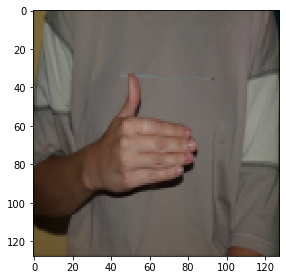

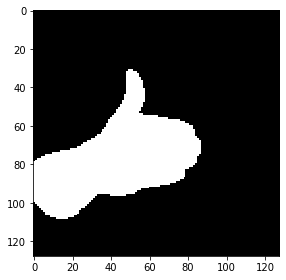

In [7]:
# Iterate over the trainloader.
images, labels = next(iter(trainloader))
print("Image Tensor type: ",images.dtype)
print("Labels Tensor type: ",labels.dtype)
image = images[0].numpy()
image = np.transpose(image, (1,2,0)) 
imshow(image)
plt.show()
label = labels[0].numpy()
label = np.transpose(label, (1,2,0)) 
imshow(label)
plt.show()

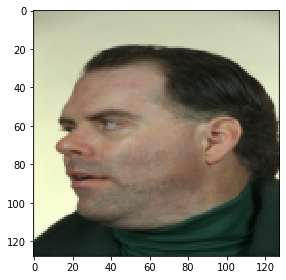

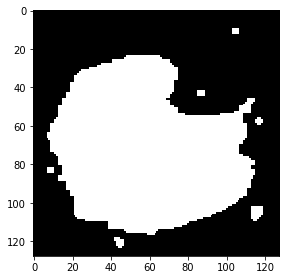

In [8]:
# Iterate over the testloader.
images, labels = next(iter(testloader))
image = images[0].numpy()
image = np.transpose(image, (1,2,0)) 
imshow(image)
plt.show()
label = labels[0].numpy()
imshow(label[0])
plt.show()

#### D) Construct the Unet model.

In [9]:
model = UNet(input_channels=3)
model.to(device=device)

UNet(
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(scale_factor=2.0, mode=bilinear)
  (double_conv_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace=True)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (double_conv_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace=Tru

#### E) Fit the model to the training data

In [10]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [11]:
num_epochs = 15
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print("Epoch: ", epoch+1)
    loss_over_batches = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device=device, dtype=torch.float)
        labels = labels.to(device=device,dtype=torch.float)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        loss_over_batches.append(loss.item())
        if i % 100 == 0:    # print every 100 mini-batches
            print("Training loss: {}, Batches Processed: {}".format((np.sum(loss_over_batches) / len(loss_over_batches)),len            (loss_over_batches)))

print('Finished Training')

Epoch:  1
Training loss: 0.7279661893844604, Batches Processed: 1
Training loss: 0.38998742947484005, Batches Processed: 101
Training loss: 0.3611928394333047, Batches Processed: 201
Training loss: 0.3388629238371833, Batches Processed: 301
Training loss: 0.32249687887040757, Batches Processed: 401
Epoch:  2
Training loss: 0.1993301659822464, Batches Processed: 1
Training loss: 0.24233514675409487, Batches Processed: 101
Training loss: 0.24631797711351025, Batches Processed: 201
Training loss: 0.24363227495521406, Batches Processed: 301
Training loss: 0.23873816516036703, Batches Processed: 401
Epoch:  3
Training loss: 0.2169123739004135, Batches Processed: 1
Training loss: 0.20643665752198437, Batches Processed: 101
Training loss: 0.2139314912741457, Batches Processed: 201
Training loss: 0.21145819290927875, Batches Processed: 301
Training loss: 0.2087240219116211, Batches Processed: 401
Epoch:  4
Training loss: 0.19183184206485748, Batches Processed: 1
Training loss: 0.18716702536486

In [12]:
# Saving the model
PATH = '../Models/unet_pytorch.pth'
torch.save(model.state_dict(), PATH)

In [13]:
# Load the saved model for inference. 
PATH = '../Models/unet_pytorch.pth'
model = UNet(input_channels=3)
model.load_state_dict(torch.load(PATH))
model.to(device=device)
model.eval()

UNet(
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upsample): Upsample(scale_factor=2.0, mode=bilinear)
  (double_conv_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace=True)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (double_conv_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace=Tru

#### H) See predicted masks for training samples

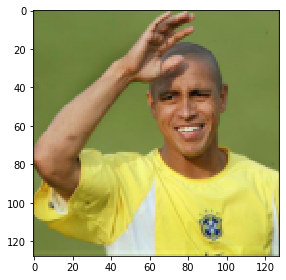

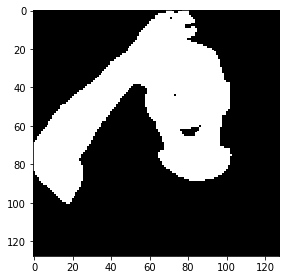

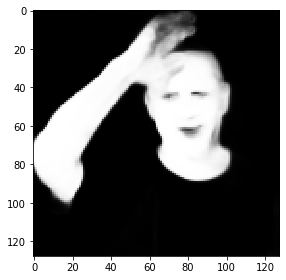

In [14]:
# Sanity check on random training samples
images, labels = next(iter(trainloader))
image_arr = images[0].numpy()
image_arr = np.transpose(image_arr, (1,2,0)) 
imshow(image_arr)
plt.show()

label = labels[0].numpy()
imshow(label[0])
plt.show()

images = images.to(device=device, dtype=torch.float)
prediction = model(images)
prediction = prediction[0].cpu().detach().numpy()
prediction = np.transpose(prediction, (1,2,0)) 
# prediction = prediction > 0.7
imshow(prediction)
plt.show()



#### I) See predicted masks for validation data

In [ ]:
# Sanity check on random testing samples
images, labels = next(iter(testloader))
image_arr = images[0].numpy()
image_arr = np.transpose(image_arr, (1,2,0)) 
imshow(image_arr)
plt.show()

label = labels[0].numpy()
imshow(label[0])
plt.show()

images = images.to(device=device, dtype=torch.float)
prediction = model(images)
prediction = prediction[0].cpu().detach().numpy()
prediction = np.transpose(prediction, (1,2,0)) 
# prediction = prediction > 0.7
imshow(prediction)
plt.show()
